In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('smartphone_uncleaned_dataset.csv')
df.head(5)

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"?54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Snapdragon 8 Gen2, Octa Core, 3.2?GHz Processor","12?GB RAM, 256?GB inbuilt",5000?mAh Battery with 100W Fast Charging,"6.7 inches, 1440?x?3216?px, 120 Hz Display wit...",50?MP + 48?MP + 32?MP Triple Rear & 16?MP Fron...,Memory Card Not Supported,Android v13
1,OnePlus Nord CE 2 Lite 5G,"?19,989",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2?GHz Processor","6?GB RAM, 128?GB inbuilt",5000?mAh Battery with 33W Fast Charging,"6.59 inches, 1080?x?2412?px, 120 Hz Display wi...",64?MP + 2?MP + 2?MP Triple Rear & 16?MP Front ...,"Memory Card (Hybrid), upto 1?TB",Android v12
2,Samsung Galaxy A14 5G,"?16,499",75.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Exynos 1330, Octa Core, 2.4?GHz Processor","4?GB RAM, 64?GB inbuilt",5000?mAh Battery with 15W Fast Charging,"6.6 inches, 1080?x?2408?px, 90 Hz Display with...",50?MP + 2?MP + 2?MP Triple Rear & 13?MP Front ...,"Memory Card Supported, upto 1?TB",Android v13
3,Motorola Moto G62 5G,"?14,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2?GHz Processor","6?GB RAM, 128?GB inbuilt",5000?mAh Battery with Fast Charging,"6.55 inches, 1080?x?2400?px, 120 Hz Display wi...",50?MP + 8?MP + 2?MP Triple Rear & 16?MP Front ...,"Memory Card (Hybrid), upto 1?TB",Android v12
4,Realme 10 Pro Plus,"?24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 1080, Octa Core, 2.6?GHz Processor","6?GB RAM, 128?GB inbuilt",5000?mAh Battery with 67W Fast Charging,"6.7 inches, 1080?x?2412?px, 120 Hz Display wit...",108?MP + 8?MP + 2?MP Triple Rear & 16?MP Front...,Memory Card Not Supported,Android v13


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,879.0,78.258248,7.402854,60.0,74.0,80.0,84.0,89.0


In [5]:
df.corr()

C:\Users\Krunal\AppData\Local\Temp\ipykernel_5904\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rating
rating,1.0


In [6]:
df.dropna(subset = ['os'], inplace=True)
df.dropna(subset = ['model'], inplace=True)
df.dropna(subset = ['card'], inplace = True)
df.dropna(subset = ['camera'], inplace = True)
df.dropna(subset = ['rating'], inplace = True)
df.isnull().sum()

model        0
price        0
rating       0
sim          0
processor    0
ram          0
battery      0
display      0
camera       0
card         0
os           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      878 non-null    object 
 1   price      878 non-null    object 
 2   rating     878 non-null    float64
 3   sim        878 non-null    object 
 4   processor  878 non-null    object 
 5   ram        878 non-null    object 
 6   battery    878 non-null    object 
 7   display    878 non-null    object 
 8   camera     878 non-null    object 
 9   card       878 non-null    object 
 10  os         878 non-null    object 
dtypes: float64(1), object(10)
memory usage: 82.3+ KB


In [8]:
import numpy as np
def introduce_nan(x,percentage):
    n = int(len(x)*(percentage - x.isna().mean()))
    idxs = np.random.choice(len(x), max(n,0), replace=False, p=x.notna()/x.notna().sum())
    x.iloc[idxs] = np.nan



In [9]:
#Applying the function to the data generates this result. 


df.apply(introduce_nan, percentage=.5)
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      439 non-null    object 
 1   price      439 non-null    object 
 2   rating     439 non-null    float64
 3   sim        439 non-null    object 
 4   processor  439 non-null    object 
 5   ram        439 non-null    object 
 6   battery    439 non-null    object 
 7   display    439 non-null    object 
 8   camera     439 non-null    object 
 9   card       439 non-null    object 
 10  os         439 non-null    object 
dtypes: float64(1), object(10)
memory usage: 82.3+ KB


In [10]:
#1) Drop observations with missing values

drop_na_strategy = df.dropna()
drop_na_strategy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 878 to 878
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1 non-null      object 
 1   price      1 non-null      object 
 2   rating     1 non-null      float64
 3   sim        1 non-null      object 
 4   processor  1 non-null      object 
 5   ram        1 non-null      object 
 6   battery    1 non-null      object 
 7   display    1 non-null      object 
 8   camera     1 non-null      object 
 9   card       1 non-null      object 
 10  os         1 non-null      object 
dtypes: float64(1), object(10)
memory usage: 96.0+ bytes


In [11]:
#dropna(how = ‘all’): the rows where all the column values are missing.

drop_na_all_strategy = df.dropna(how="all")
drop_na_all_strategy.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      439 non-null    object 
 1   price      439 non-null    object 
 2   rating     439 non-null    float64
 3   sim        439 non-null    object 
 4   processor  439 non-null    object 
 5   ram        439 non-null    object 
 6   battery    439 non-null    object 
 7   display    439 non-null    object 
 8   camera     439 non-null    object 
 9   card       439 non-null    object 
 10  os         439 non-null    object 
dtypes: float64(1), object(10)
memory usage: 82.3+ KB


In [12]:
#dropna(thresh = minimum_value)
drop_na_thres_strategy = df.dropna(thresh=0.6)
drop_na_thres_strategy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      439 non-null    object 
 1   price      439 non-null    object 
 2   rating     439 non-null    float64
 3   sim        439 non-null    object 
 4   processor  439 non-null    object 
 5   ram        439 non-null    object 
 6   battery    439 non-null    object 
 7   display    439 non-null    object 
 8   camera     439 non-null    object 
 9   card       439 non-null    object 
 10  os         439 non-null    object 
dtypes: float64(1), object(10)
memory usage: 82.3+ KB


In [13]:
#2) Drop columns with missing values
drop_na_cols_strategy = df.dropna(axis=1)
drop_na_cols_strategy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 0 to 1019
Empty DataFrame


In [14]:
#Mean/Median Imputation
#Illustration of mean imputation.

mean_value = df.mean()
mean_imputation = df.fillna(mean_value)


C:\Users\Krunal\AppData\Local\Temp\ipykernel_5904\4286444710.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_value = df.mean()


In [15]:
#Illustration of median imputation

median_value = df.median()
median_imputation = df.fillna(median_value)
median_imputation.head()



C:\Users\Krunal\AppData\Local\Temp\ipykernel_5904\2534374884.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median_value = df.median()


,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"?54,999",89.0,NaN,NaN,NaN,NaN,NaN,50?MP + 48?MP + 32?MP Triple Rear & 16?MP Fron...,Memory Card Not Supported,Android v13
1,NaN,NaN,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2?GHz Processor","6?GB RAM, 128?GB inbuilt",NaN,"6.59 inches, 1080?x?2412?px, 120 Hz Display wi...",NaN,"Memory Card (Hybrid), upto 1?TB",NaN
2,Samsung Galaxy A14 5G,NaN,80.0,NaN,"Exynos 1330, Octa Core, 2.4?GHz Processor",NaN,NaN,NaN,NaN,"Memory Card Supported, upto 1?TB",NaN
3,Motorola Moto G62 5G,NaN,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2?GHz Processor",NaN,NaN,NaN,NaN,"Memory Card (Hybrid), upto 1?TB",NaN
4,NaN,"?24,999",82.0,NaN,NaN,NaN,5000?mAh Battery with 67W Fast Charging,"6.7 inches, 1080?x?2412?px, 120 Hz Display wit...",108?MP + 8?MP + 2?MP Triple Rear & 16?MP Front...,NaN,NaN


In [16]:
#Random Sample Imputation
def random_sample_imputation(df):
    cols_with_missing_values = df.columns[df.isna().any()].tolist()
    
    for var in cols_with_missing_values:
        # extract a random sample
        random_sample_df = df[var].dropna().sample(df[var].isnull().sum(),
                                                  random_state=0)
        # re-index the randomly extracted sample
        random_sample_df.index = df[ df[var].isnull()].index
        # replace the NA
        df.loc[df[var].isnull(), var] = random_sample_df
        return df

In [17]:
df = df.copy()
random_sample_imp_df = random_sample_imputation(df)
random_sample_imp_df.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"?54,999",89.0,NaN,NaN,NaN,NaN,NaN,50?MP + 48?MP + 32?MP Triple Rear & 16?MP Fron...,Memory Card Not Supported,Android v13
1,Xiaomi Mi 11 Lite NE 5G (8GB RAM + 128GB),NaN,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2?GHz Processor","6?GB RAM, 128?GB inbuilt",NaN,"6.59 inches, 1080?x?2412?px, 120 Hz Display wi...",NaN,"Memory Card (Hybrid), upto 1?TB",NaN
2,Samsung Galaxy A14 5G,NaN,NaN,NaN,"Exynos 1330, Octa Core, 2.4?GHz Processor",NaN,NaN,NaN,NaN,"Memory Card Supported, upto 1?TB",NaN
3,Motorola Moto G62 5G,NaN,81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2?GHz Processor",NaN,NaN,NaN,NaN,"Memory Card (Hybrid), upto 1?TB",NaN
4,Samsung Galaxy F22 (6GB RAM + 128GB),"?24,999",82.0,NaN,NaN,NaN,5000?mAh Battery with 67W Fast Charging,"6.7 inches, 1080?x?2412?px, 120 Hz Display wit...",108?MP + 8?MP + 2?MP Triple Rear & 16?MP Front...,NaN,NaN


In [18]:
# Assuming df is your DataFrame
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].astype('category')


In [19]:
for column in object_columns:
    print(f"Unique values in {column}: {df[column].unique()}")


Unique values in model: ['OnePlus 11 5G', 'Xiaomi Mi 11 Lite NE 5G (8GB RAM + 128GB)', 'Samsung Galaxy A14 5G', 'Motorola Moto G62 5G', 'Samsung Galaxy F22 (6GB RAM + 128GB)', ..., 'Realme GT 2 Explorer Master Edition', 'Apple iPhone 15 Plus', 'ZTE Axon 30S', 'Samsung Galaxy A22', 'Google Pixel 5A']
Length: 439
Categories (439, object): ['Apple iPhone 11', 'Apple iPhone 12 Mini', 'Apple iPhone 12 Mini (128GB)', 'Apple iPhone 13', ..., 'iQOO Z7 5G', 'iQOO Z7 Pro 5G', 'iQOO Z8 5G', 'itel Vision 3']
Unique values in price: ['?54,999', NaN, '?24,999', '?65,999', '?29,999', ..., '?7,790', '?30,994', '?17,499', '?6,490', '?28,990']
Length: 208
Categories (207, object): ['?1,04,999', '?1,19,990', '?1,29,900', '?1,29,990', ..., '?9,589', '?9,990', '?9,999', '?95,999']
Unique values in sim: [NaN, 'Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi', 'Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC', 'Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster', 'Dual Sim, 3G, 4G, VoLTE, Wi-Fi', ..., 'Dual Sim, 3G, 4G, VoLTE, Wi-Fi

In [20]:
#Multiple Imputation
from miceforest import ImputationKernel

mice_kernel = ImputationKernel(
data = df,
save_all_iterations = True,
random_state = 2023
)


In [21]:
mice_kernel.mice(2)
mice_imputation = mice_kernel.complete_data()
mice_imputation.head()

,model,price,rating,sim,processor,ram,battery,display,camera,card,os
0,OnePlus 11 5G,"?54,999",89.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8 Gen2, Octa Core, 3.2?GHz Processor","12?GB RAM, 256?GB inbuilt",5000?mAh Battery with 30W Fast Charging,"7.6 inches, 1768?x?2208?px, 120 Hz Display wit...",50?MP + 48?MP + 32?MP Triple Rear & 16?MP Fron...,Memory Card Not Supported,Android v13
1,Xiaomi Mi 11 Lite NE 5G (8GB RAM + 128GB),"?17,999",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2?GHz Processor","6?GB RAM, 128?GB inbuilt",4500?mAh Battery with 60W Fast Charging,"6.59 inches, 1080?x?2412?px, 120 Hz Display wi...",108?MP Quad Rear & 16?MP Front Camera,"Memory Card (Hybrid), upto 1?TB",Android v11
2,Samsung Galaxy A14 5G,"?15,990",80.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Exynos 1330, Octa Core, 2.4?GHz Processor","6?GB RAM, 128?GB inbuilt",4300?mAh Battery with 66W Fast Charging,"6.8 inches, 1080?x?2400?px Display with Punch ...",50?MP + 12?MP Dual Rear & 8?MP Front Camera,"Memory Card Supported, upto 1?TB",Android v11
3,Motorola Moto G62 5G,"?12,990",81.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Snapdragon 695, Octa Core, 2.2?GHz Processor","6?GB RAM, 128?GB inbuilt",5000?mAh Battery with 33W Fast Charging,"6.6 inches, 1080?x?2400?px, 90 Hz Display with...",64?MP + 50?MP + 8?MP Triple Rear & 16?MP Front...,"Memory Card (Hybrid), upto 1?TB",Android v11
4,Samsung Galaxy F22 (6GB RAM + 128GB),"?24,999",82.0,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC","Dimensity 800U, Octa Core, 2.4?GHz Processor","6?GB RAM, 128?GB inbuilt",5000?mAh Battery with 67W Fast Charging,"6.7 inches, 1080?x?2412?px, 120 Hz Display wit...",108?MP + 8?MP + 2?MP Triple Rear & 16?MP Front...,"Memory Card Supported, upto 2?TB",Android v12


In [22]:
# Remove the extra space in the column name
mean_imputation["rating Mean Imp"] = mean_imputation["rating"].copy()
median_imputation["rating Median Imp"] = median_imputation["rating"].copy()
random_sample_imp_df["rating Random Imp"] = random_sample_imp_df["rating"].copy()


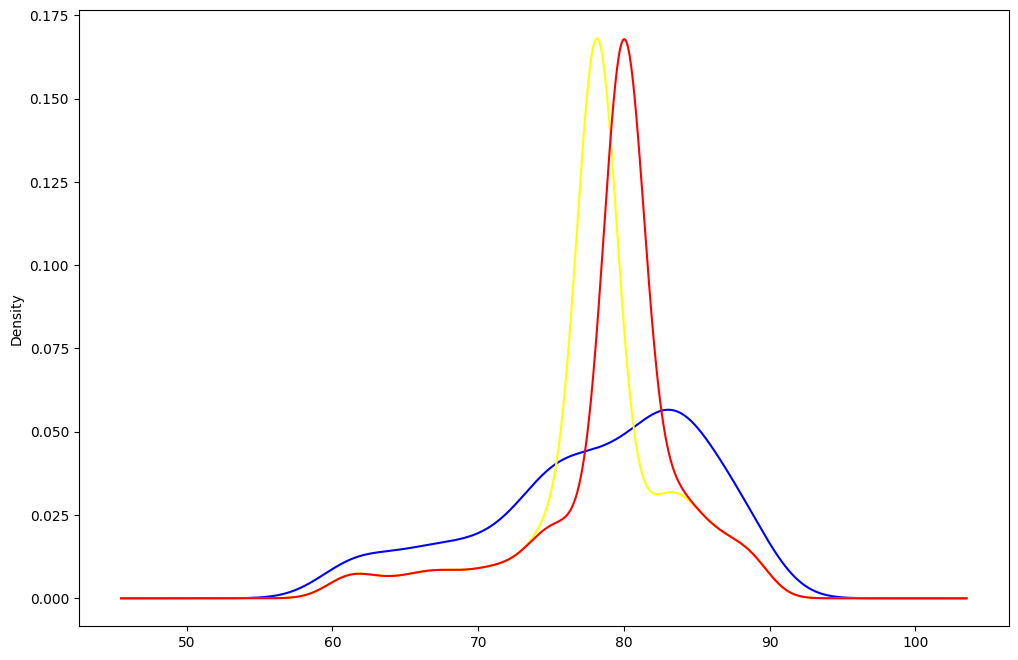

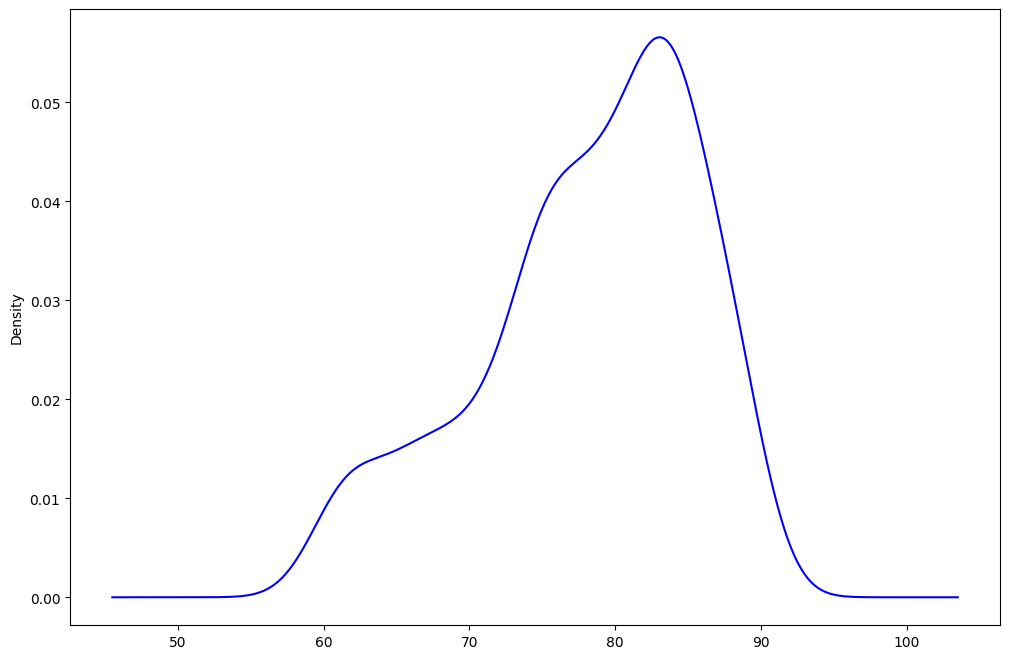

In [23]:
#data visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

df["rating"].plot(kind='kde',color='blue')
mean_imputation["rating Mean Imp"].plot(kind='kde',color='yellow')
median_imputation["rating Median Imp"].plot(kind='kde',color='red')
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
df["rating"].plot(kind='kde', color='blue')
# Add other plots if necessary
plt.show()


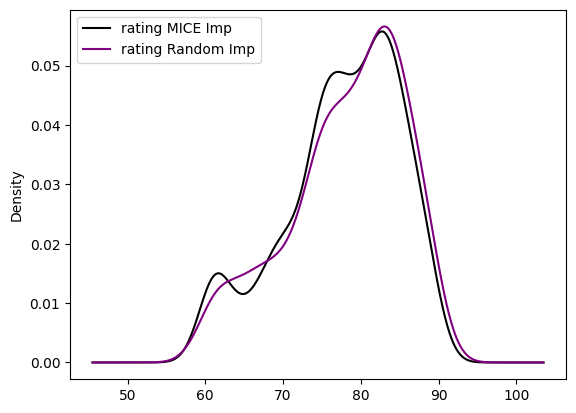

In [24]:
random_sample_imp_df["rating Random Imp"] = random_sample_imp_df["rating"]
mice_imputation["rating MICE Imp"] = mice_imputation["rating"]

mice_imputation["rating MICE Imp"].plot(kind='kde',color='black')
random_sample_imp_df["rating Random Imp"].plot(kind='kde',color='purple')

plt.legend()

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import researchpy as rp


In [26]:
data = pd.DataFrame(df)

# Select only numerical columns for correlation
numerical_columns = data.select_dtypes(include=[np.number])

# Calculate Pearson correlation coefficients
correlation_matrix = numerical_columns.corr()

# Print the correlation matrix
print("Pearson Correlation Matrix:")
print(correlation_matrix)


Pearson Correlation Matrix:
                   rating  rating Random Imp
rating                1.0                1.0
rating Random Imp     1.0                1.0


In [27]:
data = pd.DataFrame(df)

# Select only numerical columns for correlation
numerical_columns = data.select_dtypes(include=[np.number])

# Calculate Spearman correlation coefficients
correlation_matrix_spearman, _ = spearmanr(numerical_columns)

# Print the Spearman correlation matrix
print("Spearman Correlation Matrix:")
print(correlation_matrix_spearman)


Spearman Correlation Matrix:
nan


In [28]:
import pandas as pd
import researchpy as rp

# Assuming you have a DataFrame named 'data' with columns 'categorical_column1' and 'categorical_column2'
categorical_columns = 'column'  # Replace 'column1' with the actual name of your categorical column
categorical_columns = 'rating'

# Create a contingency table
contingency_table, results = rp.crosstab(data[categorical_columns], data[categorical_columns ], test='chi-square')

# Extract Cramer's V from the results
correlation_ratio = results.loc[2, 'results']


In [29]:
import researchpy as rp
data = pd.DataFrame(df)

# Select the categorical column and the numerical column for correlation ratio
categorical_column = 'sim'
numerical_column = 'rating'

# Create a contingency table
contingency_table, results = rp.crosstab(data[categorical_column], data[numerical_column], test='chi-square')


# Extract Cramer's V from the results
correlation_ratio = results.loc[2, 'results']

# Print Cramer's V
print(f"correlation_ratio's V ({categorical_column} vs {numerical_column}): {correlation_ratio}")

# Print the correlation ratio
print(f"Correlation Ratio ({categorical_column} vs {numerical_column}): {correlation_ratio}")


correlation_ratio's V (sim vs rating): 0.3893
Correlation Ratio (sim vs rating): 0.3893


In [30]:
data = pd.DataFrame(df)

# Select the categorical column and the numerical column for correlation ratio
categorical_column = 'sim'
numerical_column = 'rating'

# Create a contingency table
contingency_table, results = rp.crosstab(data[categorical_column], data[numerical_column], test='chi-square')

# Extract Cramer's V from the results
cramers_v = results.loc[2, 'results']

# Print Cramer's V
print(f"Cramer's V ({categorical_column} vs {numerical_column}): {cramers_v}")


Cramer's V (sim vs rating): 0.3893


In [31]:
import seaborn as sns

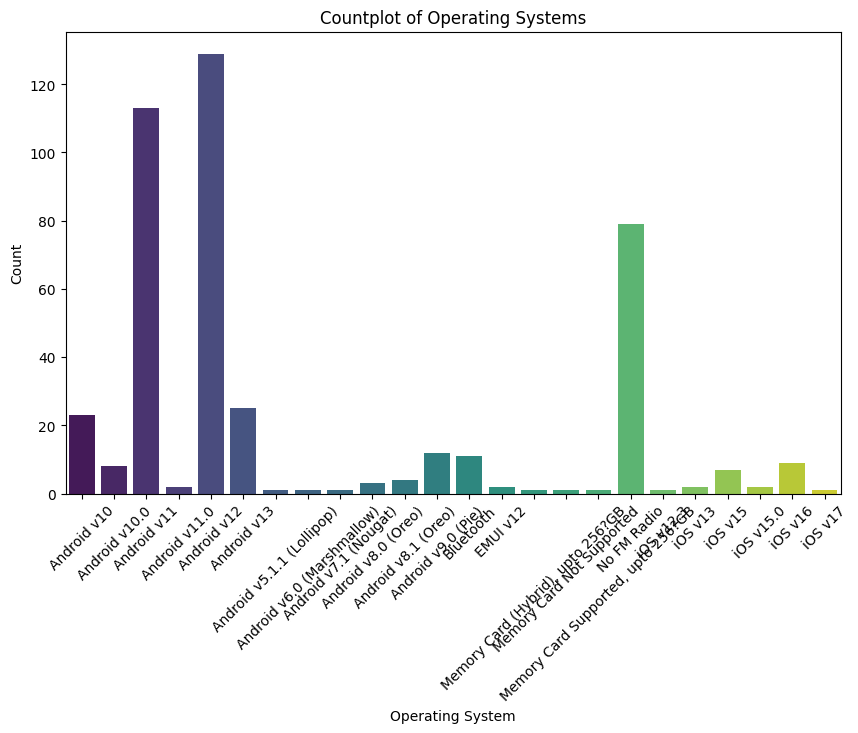

In [32]:
# Create a countplot for the 'os' column
# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(x='os', data=data, palette='viridis')
plt.title('Countplot of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


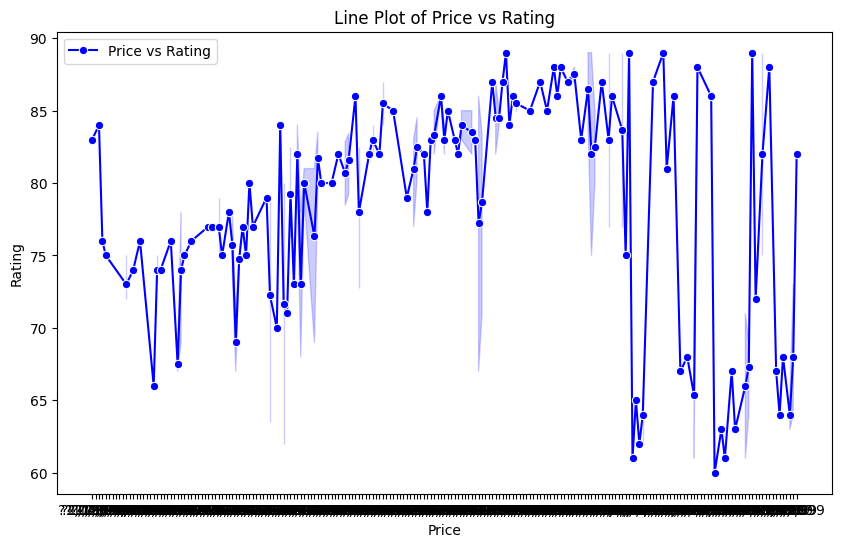

In [33]:
# Create a line plot for 'price' and 'rating'
plt.figure(figsize=(10, 6))
sns.lineplot(x='price', y='rating', data=data, marker='o', color='blue', label='Price vs Rating')
plt.title('Line Plot of Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.legend()
plt.show()


Text(0, 0.5, 'Count of Mobile OS Model')

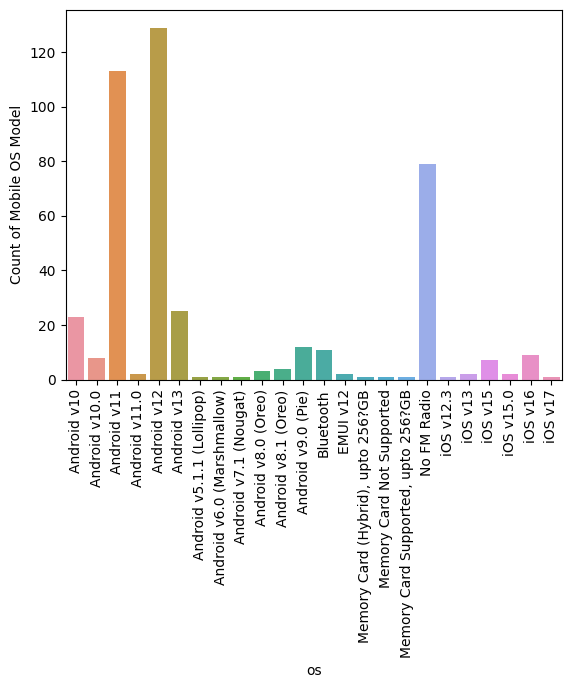

In [35]:
plt.xticks(rotation=90, fontsize=10)
sns.countplot(x= df['os'], data=df)
plt.ylabel('Count of Mobile OS Model')

In [36]:

# Sample data
data = pd.DataFrame({
    'model': ['LeEco S1 Pro', 'OnePlus Nord CE 2 Lite 5G', 'POCO C31 (4GB RAM + 64GB)', 'Vivo Y35 5G', 'Blackview BV5200 Pro'],
    'ram': ['12GB', '6GB', '4GB', '6GB', '8GB'],
    'battery': ['5000mAh', '5020mAh', '5000mAh', '6GB', '5000mAh'],
    'display': ['6.78 inches', '6.52 inches', '6.67 inches', '1.5 inches', '6.6 inches'],
    'camera': ['50MP + 48MP + 32MP', '64MP + 2MP + 2MP', '50MP + 2MP + 2MP', '50MP + 8MP + 2MP', '64MP + 2MP + 2MP'],
    'card': ['No Memory Card Support', 'Hybrid, up to 1TB', 'Hybrid, up to 1TB', 'Hybrid, up to 256GB', 'No Memory Card Support'],
    'os': ['No FM Radio', 'Android v12', 'Android v12', '0.3MP Rear Camera', 'Android v13']
})


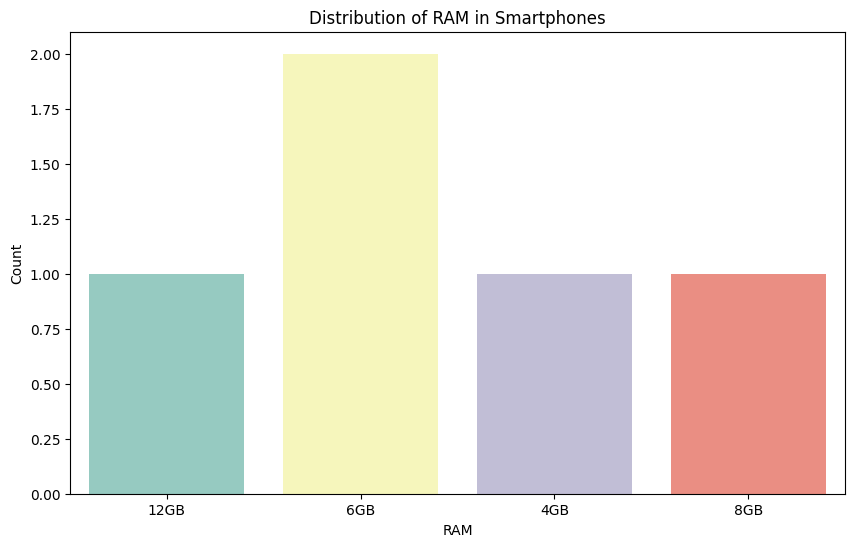

In [37]:

# Plotting the count plot for 'ram'
plt.figure(figsize=(10, 6))
sns.countplot(x='ram', data=data, palette='Set3')
plt.title('Distribution of RAM in Smartphones')
plt.xlabel('RAM')
plt.ylabel('Count')
plt.show()


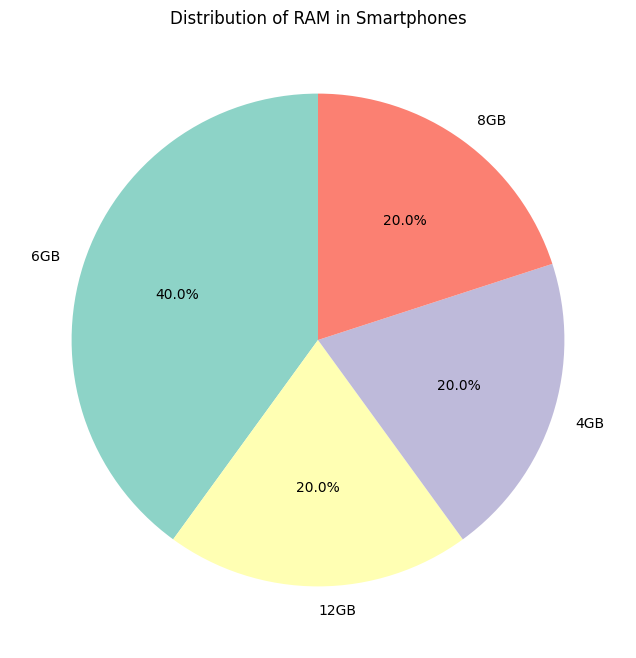

In [38]:

# Extracting RAM values and their counts
ram_counts = data['ram'].value_counts()

# Plotting the pie chart for 'ram'
plt.figure(figsize=(8, 8))
plt.pie(ram_counts, labels=ram_counts.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors, startangle=90)
plt.title('Distribution of RAM in Smartphones')
plt.show()


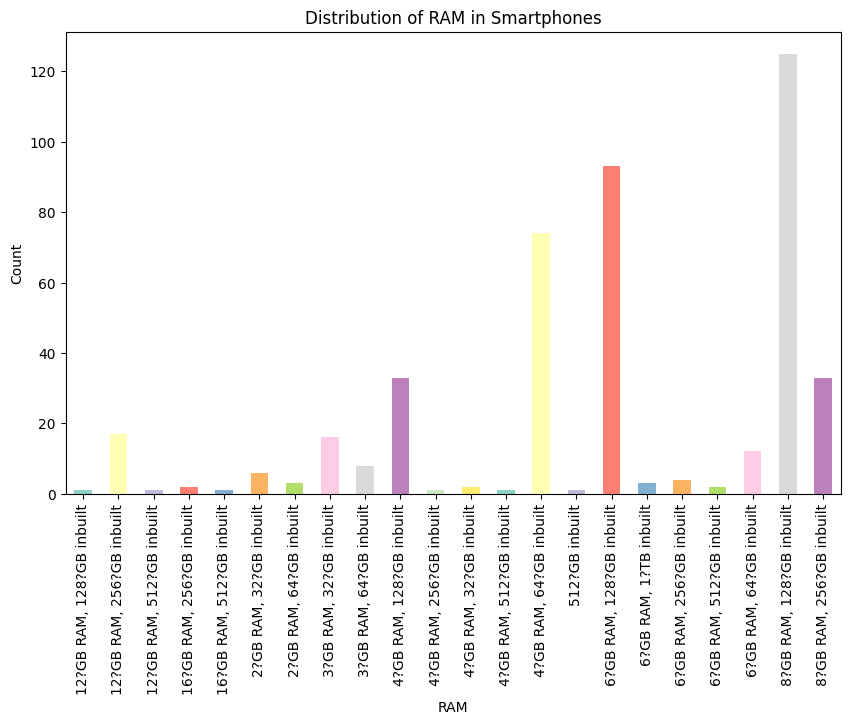

In [39]:
# Extracting RAM values and their counts
ram_counts = df['ram'].value_counts().sort_index()

# Plotting the bar chart for 'ram'
plt.figure(figsize=(10, 6))
ram_counts.plot(kind='bar', color=plt.cm.Set3.colors)
plt.title('Distribution of RAM in Smartphones')
plt.xlabel('RAM')
plt.ylabel('Count')
plt.show()


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



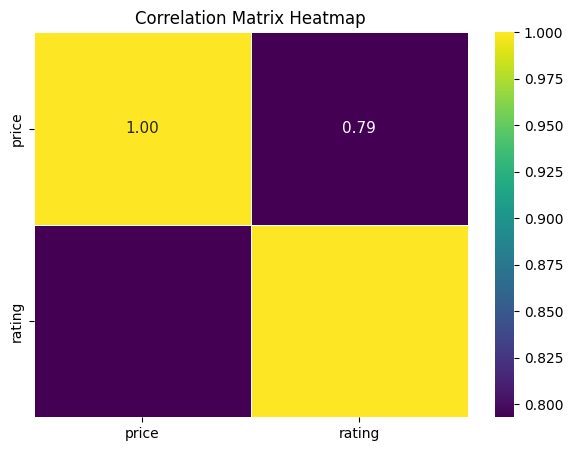

In [44]:

# Sample smartphone data with 'price' column added
data = pd.DataFrame({
    'model': ['LeEco S1 Pro', 'OnePlus Nord CE 2 Lite 5G', 'POCO C31 (4GB RAM + 64GB)', 'Vivo Y35 5G', 'Blackview BV5200 Pro'],
    'price': [41990, 19989, 13999, 6190, 24999],
    'rating': [89.0, 81.0, 75.0, 81.0, 82.0],
    'sim': ['Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...', 'Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi', 'Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi', 'Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC', 'Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...'],
    'processor': ['Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor', 'Snapdragon 695, Octa Core, 2.2 GHz Processor', 'Exynos 1330, Octa Core, 2.4 GHz Processor', '4 MB RAM, 4 MB inbuilt', 'Dimensity 1080, Octa Core, 2.6 GHz Processor'],
    'ram': ['12 GB RAM, 256 GB inbuilt', '6 GB RAM, 128 GB inbuilt', '4 GB RAM, 64 GB inbuilt', '6 GB RAM, 128 GB inbuilt', '8 GB RAM, 128 GB inbuilt'],
    'battery': ['5000 mAh Battery with 120W Fast Charging', '5020 mAh Battery with 33W Fast Charging', '5000 mAh Battery with 15W Fast Charging', 'Not specified', '5000 mAh Battery with 67W Fast Charging'],
    'display': ['6.78 inches, 1440 x 3200 px, 144 Hz Display wi...', '6.52 inches, 720 x 1600 px Display with Water ...', '6.67 inches, 1080 x 2400 px Display with Punch...', '1.5 inches, 128 x 128 px Display', '6.6 inches, 1080 x 2460 px, 144 Hz Display wit...'],
    'camera': ['50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...', '64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...', '50 MP + 2 MP + 2 MP Triple Rear & 8 MP Front C...', '50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...', '64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...'],
    'card': ['Memory Card Not Supported', 'Memory Card (Hybrid), up to 1 TB', 'Memory Card (Hybrid), up to 1 TB', 'Memory Card (Hybrid), up to 256 GB', 'Memory Card Not Supported'],
    'os': ['No FM Radio', 'Android v12', 'Android v12', '0.3 MP Rear Camera', 'Android v13']
})

# Select numerical columns for the correlation matrix
numerical_columns = ['price', 'rating']

# Convert selected columns to float data type if possible
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Create a correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(7, 5))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", xticklabels=True, yticklabels=True, linewidths=.5, annot_kws={"size": 11})

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()


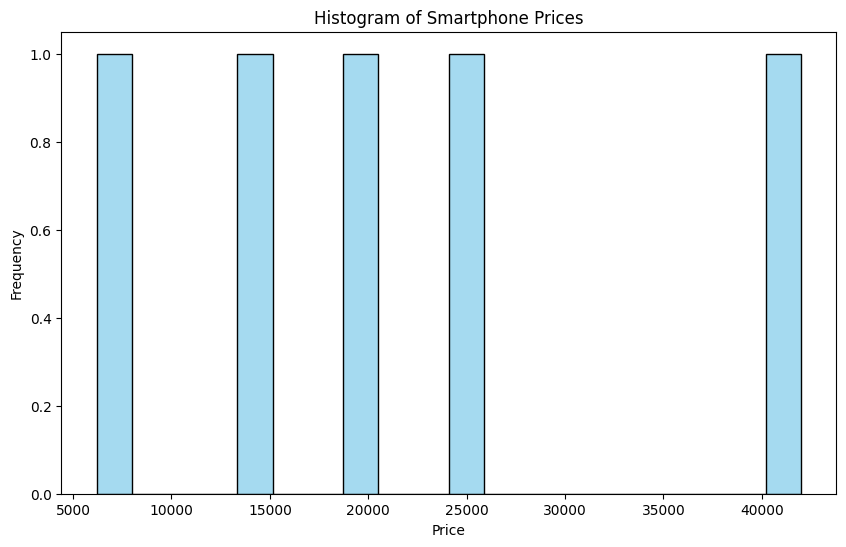

In [42]:
# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=20, kde=False, color='skyblue')
plt.title('Histogram of Smartphone Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


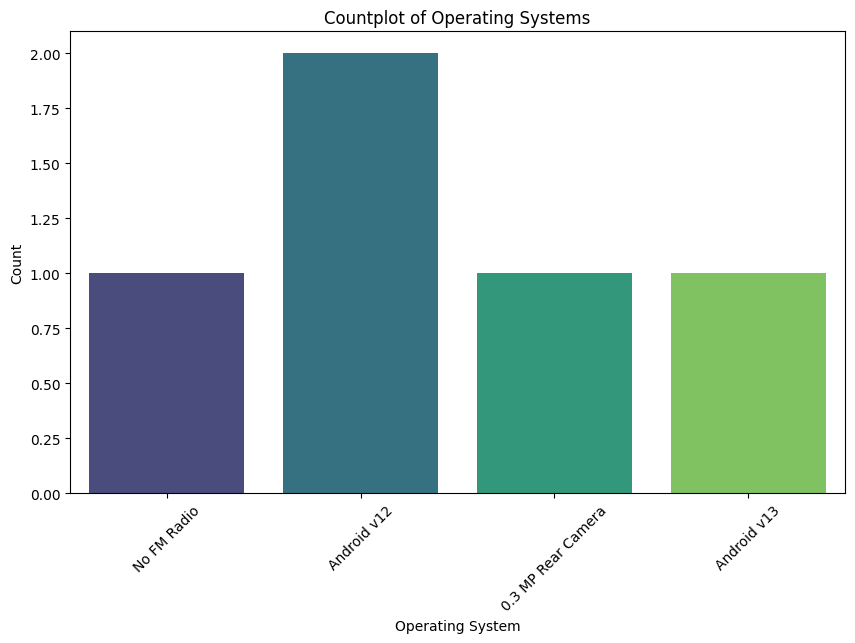

In [43]:
# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 6))
sns.countplot(x='os', data=data, palette='viridis')
plt.title('Countplot of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
